<a href="https://colab.research.google.com/github/Yasuda5160/IPython_projects/blob/master/experimental_data/rutherford/dataanalysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# -*- coding: utf-8 -*-
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from numpy.random import randn, rand
from matplotlib.pylab import close
import matplotlib.pyplot as plt
import sympy as sy
#Input Sections
which = input('Which kind of data file are you choosing? csv or dat format?: ')
File1 = input('What is the name of your experimental data file?: ')
File2 = input('What is the name of your experimental data file?: ')
File3 = input('What is the name of your experimental data file?: ')

#Importing basic data from a CSV-style experimental data file
if (which == 'csv'):
  df = pd.read_csv(File)
elif (which == 'dat'):
  df = pd.read_csv(File1, sep='\s+')
  df2 = pd.read_csv(File2, sep='\s+')
  df3 = pd.read_csv(File3, sep='\s+')

Which kind of data file are you choosing? csv or dat format?: dat
What is the name of your experimental data file?: /content/Rutherford_Data/2010140_pedestal.dat
What is the name of your experimental data file?: /content/Rutherford_Data/2010141_nofoil.dat
What is the name of your experimental data file?: /content/Rutherford_Data/2010142_withfoil.dat


In [6]:
df.describe()

,A1,A2,A3,A4,Cathode
count,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000
mean,785.139853,586.949877,497.045405,492.228010,443.207273
std,107.328905,97.724545,90.657679,83.637344,22.253578
min,489.000000,314.000000,360.000000,367.000000,407.000000
25%,710.000000,522.000000,428.000000,428.000000,432.000000
50%,775.000000,579.000000,486.000000,482.000000,441.000000
75%,850.000000,640.000000,553.000000,545.000000,451.000000
max,1586.000000,2396.000000,1029.000000,1442.000000,921.000000


In [7]:
df2.describe()

,A1,A2,A3,A4,Cathode
count,126137.000000,126137.000000,126137.000000,126137.000000,126137.000000
mean,2005.526578,1689.637172,1715.112917,1540.636039,2226.708642
std,183.265086,167.310085,178.581654,158.855080,92.623252
min,621.000000,464.000000,407.000000,407.000000,1248.000000
25%,1891.000000,1585.000000,1604.000000,1442.000000,2216.000000
50%,2008.000000,1694.000000,1718.000000,1543.000000,2241.000000
75%,2125.000000,1799.000000,1832.000000,1643.000000,2263.000000
max,4096.000000,4096.000000,3710.000000,4096.000000,4096.000000


In [8]:
df3.describe()

,A1,A2,A3,A4,Cathode
count,134299.000000,134299.000000,134299.000000,134299.000000,134299.000000
mean,1798.925003,1510.567346,1515.961965,1404.550816,1950.071058
std,235.875518,210.688555,225.909593,206.158143,189.224704
min,513.000000,303.000000,362.000000,370.000000,565.000000
25%,1684.000000,1406.000000,1404.000000,1301.000000,1943.000000
50%,1814.000000,1524.000000,1530.000000,1418.000000,1989.000000
75%,1941.000000,1638.000000,1653.000000,1530.000000,2027.000000
max,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000


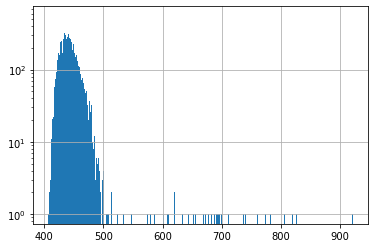

In [9]:
df['Cathode'].hist(bins = 500, log = 1); # 基数の数を1000個にする  
plt.savefig("Pedestal_Cathode_histgram_log.png")

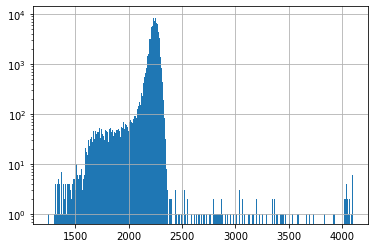

In [10]:
df2['Cathode'].hist(bins = 500, log = 1); # 基数の数を1000個にする  
plt.savefig("Nofoil_Cathode_histgram_log.png")

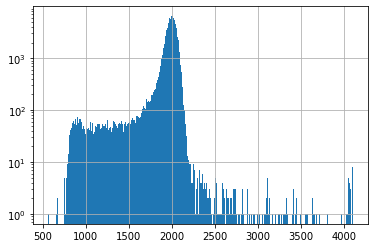

In [11]:
df3['Cathode'].hist(bins = 500, log = 1); # 基数の数を1000個にする  
plt.savefig("Withfoil_Cathode_histgram_log.png")

In [12]:
"""
Error Propagation Law for arbitrary functions f(x, y)
import math
x, y = sy.symbols("x y")
function = input("f(x,y)= ")
f = eval(function)
err_f = math.sqrt(errdf0**2 * (sy.diff(f, x).subs([(x, df[df.columns[xaxisdata]].mean()), (y, df[df.columns[yaxisdata]].mean())]))**2 + errdf1**2 * (sy.diff(f, y).subs([(x, df[df.columns[xaxisdata]].mean()), (y, df[df.columns[yaxisdata]].mean())]))**2)

#Creating a new columns for some indirect observables
def indirect(frame):
    return f.subs([(x, frame.iloc[xaxisdata]), (y, frame.iloc[yaxisdata])])
df['f(x, y)'] = df.apply(indirect, axis = 1)
"""

'\nError Propagation Law for arbitrary functions f(x, y)\nimport math\nx, y = sy.symbols("x y")\nfunction = input("f(x,y)= ")\nf = eval(function)\nerr_f = math.sqrt(errdf0**2 * (sy.diff(f, x).subs([(x, df[df.columns[xaxisdata]].mean()), (y, df[df.columns[yaxisdata]].mean())]))**2 + errdf1**2 * (sy.diff(f, y).subs([(x, df[df.columns[xaxisdata]].mean()), (y, df[df.columns[yaxisdata]].mean())]))**2)\n\n#Creating a new columns for some indirect observables\ndef indirect(frame):\n    return f.subs([(x, frame.iloc[xaxisdata]), (y, frame.iloc[yaxisdata])])\ndf[\'f(x, y)\'] = df.apply(indirect, axis = 1)\n'

Which Columns do you want to use for x axis to this Data plotting?2
Which Columns do you want to use for y axis to this Data plotting?3
What is the title of your Graph?: title
What is the label of x axis?: xaxis
What is the label of y axis?: yaxis


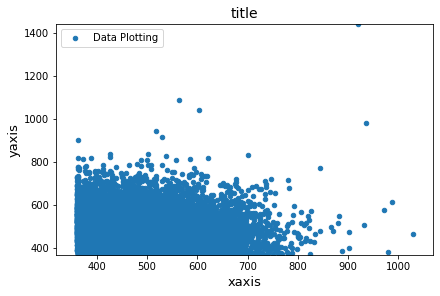

In [13]:

xaxisdata = input('Which Columns do you want to use for x axis to this Data plotting?')
yaxisdata = input('Which Columns do you want to use for y axis to this Data plotting?')
Title = input('What is the title of your Graph?: ')
Xlabel = input('What is the label of x axis?: ')
Ylabel = input('What is the label of y axis?: ')

xaxisdata = int(xaxisdata)
yaxisdata = int(yaxisdata)
df = df[df > 0]
num = len(df)
Xstd = df[df.columns[xaxisdata]].std()
Ystd = df[df.columns[yaxisdata]].std()

#Errors for direct observables
err_df0 = DataFrame(Xstd/np.sqrt(num -1), index=range(num), columns=[df.columns[xaxisdata], df.columns[yaxisdata]])
err_df1 =  DataFrame(Ystd/np.sqrt(num - 1), index=range(num), columns=[df.columns[xaxisdata], df.columns[yaxisdata]])
#Preparing Plotting Figure & Environment
fig, axes = plt.subplots(constrained_layout = True, facecolor = 'white')
axes.axis([df[df.columns[xaxisdata]].min() - 40, df[df.columns[xaxisdata]].max() + 40, df[df.columns[yaxisdata]].min() - 1, df[df.columns[yaxisdata]].max() + 1])

#Creating Scatter Graph of Experimental Data
df.plot(kind='scatter', x=df.columns[xaxisdata], y=df.columns[yaxisdata], xerr=err_df0, yerr=err_df1, ax=axes,label = 'Data Plotting')
axes.set_title(Title, fontsize = 14)
axes.set_xlabel(Xlabel, fontsize = 13)
axes.set_ylabel(Ylabel, fontsize = 13)
axes.legend()
plt.savefig("figure.png", transparent=True)

In [14]:
"""
#Linear Estimation by using Least Squared Regression
df2 = df[df.columns[xaxisdata]] * df[df.columns[yaxisdata]]
df22 = pd.DataFrame({'Covariance': df2})
df3 = pd.concat([df, df22], axis = 1)
Cov = df22.mean() - df[df.columns[xaxisdata]].mean() * df[df.columns[yaxisdata]].mean()
a = Cov / (df[df.columns[xaxisdata]].std())**2
b = - a * df[df.columns[xaxisdata]].mean() + df[df.columns[yaxisdata]].mean()
x1 = np.linspace(df[df.columns[xaxisdata]].min() - 20, df[df.columns[xaxisdata]].max() + 20, 100)
l = a.values[0]
k = b.values[0]
errdf0 = err_df0.values[0][0]
errdf1 = err_df1.values[0][0]
y1 = l * x1 + k

#Plotting on the Scatter Graph
axes.plot(x1, y1, color = '#ff7f00', label = 'Linear Estimation')
axes.legend()

#Identification of the regression line
x = sy.symbols('x')
eq = l * x + k
print(eq)
print(err_f)
"""

"\n#Linear Estimation by using Least Squared Regression\ndf2 = df[df.columns[xaxisdata]] * df[df.columns[yaxisdata]]\ndf22 = pd.DataFrame({'Covariance': df2})\ndf3 = pd.concat([df, df22], axis = 1)\nCov = df22.mean() - df[df.columns[xaxisdata]].mean() * df[df.columns[yaxisdata]].mean()\na = Cov / (df[df.columns[xaxisdata]].std())**2\nb = - a * df[df.columns[xaxisdata]].mean() + df[df.columns[yaxisdata]].mean()\nx1 = np.linspace(df[df.columns[xaxisdata]].min() - 20, df[df.columns[xaxisdata]].max() + 20, 100)\nl = a.values[0]\nk = b.values[0]\nerrdf0 = err_df0.values[0][0]\nerrdf1 = err_df1.values[0][0]\ny1 = l * x1 + k\n\n#Plotting on the Scatter Graph\naxes.plot(x1, y1, color = '#ff7f00', label = 'Linear Estimation')\naxes.legend()\n\n#Identification of the regression line\nx = sy.symbols('x')\neq = l * x + k\nprint(eq)\nprint(err_f)\n"

In [15]:
df4 = (df3 - df).dropna(how='all')
df4.describe()

,A1,A2,A3,A4,Cathode
count,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000
mean,1010.528452,922.563047,1013.813956,904.802948,1492.404226
std,255.343507,228.928195,238.273290,219.880051,184.417565
min,-285.000000,-571.000000,-247.000000,-175.000000,173.000000
25%,874.500000,800.000000,883.000000,791.000000,1484.500000
50%,1031.000000,936.000000,1027.000000,919.000000,1531.000000
75%,1173.500000,1069.000000,1169.000000,1039.000000,1568.000000
max,2928.000000,3206.000000,2396.000000,3632.000000,3606.000000


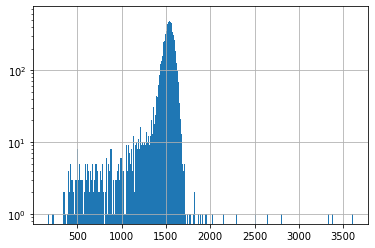

In [16]:
df4['Cathode'].hist(bins = 500, log = 1); # 基数の数を1000個にする  
plt.savefig("Nofoil_error_subtraction.png")